In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

data=pd.read_csv("Comcast_telecom.csv")
data.head() #Fetches default first 5 rows

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-2015,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-2015,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-2015,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-2015,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-2015,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [92]:
data.isnull().sum()
data.isna().sum()

Ticket #                       0
Customer Complaint             0
Date                           0
Date_month_year                0
Time                           0
Received Via                   0
City                           0
State                          0
Zip code                       0
Status                         0
Filing on Behalf of Someone    0
dtype: int64

In [93]:
data.shape

(2224, 11)

In [96]:
# Encoding Categorical Data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cust_comp = le.fit_transform(data.iloc[:,1])
rec_via = le.fit_transform(data.iloc[:,5])
city = le.fit_transform(data.iloc[:,6])
state = le.fit_transform(data.iloc[:,7])
#status = le.fit_transform(data.iloc[:,9])
onbehalf = le.fit_transform(data.iloc[:,10])

In [97]:
# Defining the Independent Variables
X=data.drop(['Ticket #','Date','Date_month_year','Time','Zip code','Status'], axis=1)
print(X)

                                     Customer Complaint        Received Via  \
0                         Comcast Cable Internet Speeds  Customer Care Call   
1          Payment disappear - service got disconnected            Internet   
2                                     Speed and Service            Internet   
3     Comcast Imposed a New Usage Cap of 300GB that ...            Internet   
4            Comcast not working and no service to boot            Internet   
...                                                 ...                 ...   
2219                               Service Availability  Customer Care Call   
2220         Comcast Monthly Billing for Returned Modem  Customer Care Call   
2221                            complaint about comcast            Internet   
2222             Extremely unsatisfied Comcast customer  Customer Care Call   
2223               Comcast, Ypsilanti MI Internet Speed  Customer Care Call   

            City     State Filing on Behalf of Some

In [98]:
# One Hot encoding of Categorical independent variables
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
X = onehotencoder.fit_transform(X).toarray()

In [108]:
# Defining the Dependent Variables
y=[1 if Status=="Open" or Status=="Pending" else 0 for Status in data["Status"]]
y

[0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,


In [109]:
# Training the model on Train data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [110]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [111]:
# Applying the Decision Tree Algorithm
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [117]:
# Predict the test result
y_pred = regressor.predict(X_test)
y_pred

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0.

In [118]:
# To find Accuracy of the model
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,y_pred)
print(cm)
a = accuracy_score(y_test,y_pred)
print('The accuracy of the model is :',a*100)

[[408  30]
 [104  14]]
The accuracy of the model is : 75.89928057553958


In [120]:
# Applying the Logistic Regression Model
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

# Predicting the test set
y_pred = classifier.predict(X_test)

In [121]:
# To find Accuracy of the model
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,y_pred)
print(cm)
a = accuracy_score(y_test,y_pred)
print('The accuracy of the model is :',a*100)

[[398  40]
 [105  13]]
The accuracy of the model is : 73.92086330935251


In [124]:
# Applying the Random Forest Algorithm
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(criterion = 'entropy', random_state = 0, n_estimators = 100)
classifier.fit(X_train, y_train)

# Predicting the test set
y_pred = classifier.predict(X_test)

In [125]:
# To find Accuracy of the model
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,y_pred)
print(cm)
a = accuracy_score(y_test,y_pred)
print('The accuracy of the model is :',a*100)

[[427  11]
 [113   5]]
The accuracy of the model is : 77.6978417266187


In [15]:
# Removing unnecessary data & obtaining date,month,year fields separately
from datetime import datetime
growth = data.copy()
growth['Date'] = pd.to_datetime(growth.Date,format='%d-%m-%Y')
growth['Year'] = growth['Date'].dt.year
growth['Month'] = growth['Date'].dt.month
growth['Day'] = growth['Date'].dt.day
growth.drop(['Ticket #','Date','Date_month_year','Time','Zip code'], axis=1, inplace=True)
growth.head()

,Customer Complaint,Received Via,City,State,Status,Filing on Behalf of Someone,Year,Month,Day
0,Comcast Cable Internet Speeds,Customer Care Call,Abingdon,Maryland,Closed,No,2015,4,22
1,Payment disappear - service got disconnected,Internet,Acworth,Georgia,Closed,No,2015,8,4
2,Speed and Service,Internet,Acworth,Georgia,Closed,Yes,2015,4,18
3,Comcast Imposed a New Usage Cap of 300GB that ...,Internet,Acworth,Georgia,Open,Yes,2015,7,5
4,Comcast not working and no service to boot,Internet,Acworth,Georgia,Solved,No,2015,5,26


### 1. TO OBTAIN NO OF COMPLAINTS IN MONTHLY AND DAILY FORMAT

In [16]:
noc_pm = growth['Month'].value_counts()
print(noc_pm)

6     1046
4      375
5      317
8       67
12      65
2       59
9       55
1       55
10      53
7       49
3       45
11      38
Name: Month, dtype: int64


#### June has the highest number of complaints logged with 1046 complaints.

In [17]:
noc_pd = growth['Day'].value_counts()
print(noc_pd)

6     272
24    249
23    225
4     206
5     131
25    126
26     90
29     87
30     86
27     81
28     79
18     69
13     68
22     66
16     65
17     60
15     58
14     54
20     51
19     50
21     41
31     10
Name: Day, dtype: int64


### 2. Trend chart showing number of complaints at monthly and daily granularity levels

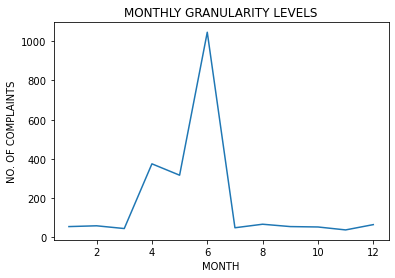

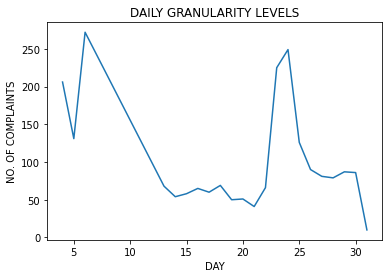

In [19]:
sns.lineplot( data = noc_pm)
plt.title('MONTHLY GRANULARITY LEVELS')
plt.xlabel('MONTH')
plt.ylabel('NO. OF COMPLAINTS')
plt.show()

sns.lineplot( data = noc_pd)
plt.title('DAILY GRANULARITY LEVELS')
plt.xlabel('DAY')
plt.ylabel('NO. OF COMPLAINTS')
plt.show()

### 3.Provide a table with the frequency of complaint types

In [ ]:
comp = growth['Customer Complaint'].value_counts()
print(comp)

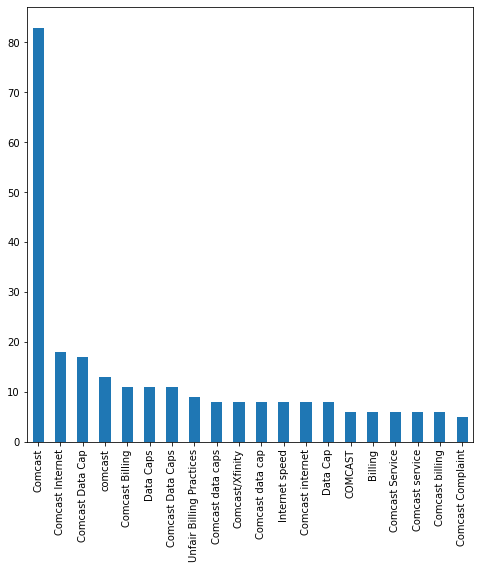

In [23]:
comp[:20].plot(kind='bar',figsize=(8,8))

### 4. Which complaint types are maximum?

In [24]:
print('Most lodged complaint is : ',growth.iloc[:,0].value_counts().idxmax())
print('City with most lodged complaints is :',growth.iloc[:,2].value_counts().idxmax())
print('State with most lodged complaints is :',growth.iloc[:,3].value_counts().idxmax())

Most lodged complaint is :  Comcast
City with most lodged complaints is : Atlanta
State with most lodged complaints is : Georgia


### 5. Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.

In [25]:
growth["Newstatus"] = ["Open" if Status=="Open" or Status=="Pending" else "Closed" for Status in growth["Status"]]
growth["Newstatus"].unique()
growth.head()

,Customer Complaint,Received Via,City,State,Status,Filing on Behalf of Someone,Year,Month,Day,Newstatus
0,Comcast Cable Internet Speeds,Customer Care Call,Abingdon,Maryland,Closed,No,2015,4,22,Closed
1,Payment disappear - service got disconnected,Internet,Acworth,Georgia,Closed,No,2015,8,4,Closed
2,Speed and Service,Internet,Acworth,Georgia,Closed,Yes,2015,4,18,Closed
3,Comcast Imposed a New Usage Cap of 300GB that ...,Internet,Acworth,Georgia,Open,Yes,2015,7,5,Open
4,Comcast not working and no service to boot,Internet,Acworth,Georgia,Solved,No,2015,5,26,Closed


### 6. Provide state wise complaint status in a stacked bar chart

In [37]:
statecomp = growth.groupby(['State','Newstatus']).size().unstack().fillna(0)
statecomp.head()

Newstatus,Closed,Open
State,,
Alabama,17.0,9.0
Arizona,14.0,6.0
Arkansas,6.0,0.0
California,159.0,61.0
Colorado,58.0,22.0


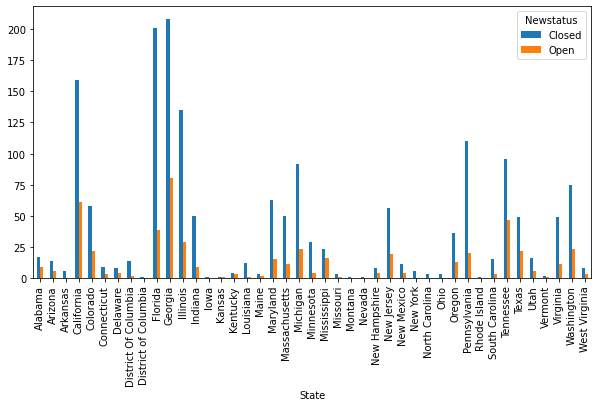

In [39]:
statecomp.plot(kind="bar", figsize=(10,5))

#### 7. Which state has the maximum complaints?

In [50]:
statecomp.sort_values("Closed",axis = 0,ascending=False)
print("State with maximum complaints:" ,growth.iloc[:,3].value_counts().idxmax(),"\n",statecomp.max())

State with maximum complaints: Georgia 
 Newstatus
Closed    208.0
Open       80.0
dtype: float64


### 8. Provide the percentage of complaints resolved till date.

In [62]:
info = growth.groupby(['Received Via','Newstatus']).size().unstack().fillna(0)
print(info)

Newstatus           Closed  Open
Received Via                    
Customer Care Call     864   255
Internet               843   262


In [63]:
total_comp =info['Closed']+info['Open']
print('The total complaints',total_comp)
percentage = info['Closed']/total_comp*100
print('The percentage of complaints resolved',percentage)

The total complaints Received Via
Customer Care Call    1119
Internet              1105
dtype: int64
The percentage of complaints resolved Received Via
Customer Care Call    77.211796
Internet              76.289593
dtype: float64
